<center>
    <h1><b>Multivariate Linear Regression</b></h1>
</center>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [2]:
data = {'area': [2600, 3000, 3200, 3600, 4000],
       'bedrooms':[3, 4, np.NaN, 3, 5],
       'age': [20, 15, 18, 30, 8],
       'price': [550000, 565000, 610000, 595000, 760000]}

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [5]:
# Handling null value in the datframe
median = int(math.floor(df['bedrooms'].median()))  # to floor the value: removing the float value


In [6]:
df['bedrooms'] = df['bedrooms'].fillna(median)

In [7]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [8]:
# Creating Linear Regression object
model = linear_model.LinearRegression()

In [9]:
model.fit(df[['area', 'bedrooms', 'age']], df['price'])

LinearRegression()

In [10]:
coefficient = model.coef_
coefficient

array([   137.25, -26025.  ,  -6825.  ])

In [11]:
intercept = model.intercept_
intercept

383724.9999999998

In [12]:
model.predict([[3000, 3, 40]])  #  prediction of 3000 sqrft, 3 bedrooms, and 40 years old aparment

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [13]:
model.predict([[2500, 4, 5]])

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588625.])

In [14]:
# The breakdown of the prediction: dependent var = coefficients* independent var + intercept
coefficient[0] * 3000 + coefficient[1] * 3 + coefficient[2] * 40 + intercept

444400.00000000006

## Exercise

In [15]:
data2 = {'experience': [np.NaN, np.NaN, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
         'test_score': [8, 8, 6, 10, 9, 7, np.NaN, 7],
         'interview_score': [9, 6, 7, 10, 6, 10, 7, 8],
         'salary': [50000, 45000, 60000, 65000, 70000, 62000, 72000, 80000]
        }

In [16]:
df1 = pd.DataFrame(data2)

In [17]:
df1

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [18]:
df1['experience'] = df1['experience'].fillna('zero')

In [19]:
df1

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [20]:
test_median = df1['test_score'].median()
df1['test_score'] = df1['test_score'].fillna(test_median)

In [21]:
df1

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [22]:
pip install word2number  # this will help to convert numbers in word to numeric

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [23]:
from word2number import w2n

In [24]:
df1['experience'] = df1['experience'].apply(w2n.word_to_num)

In [25]:
df1

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


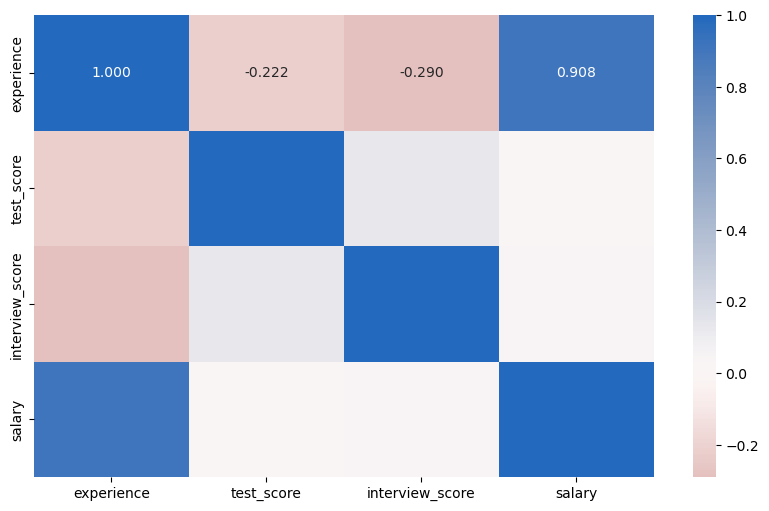

In [26]:
# Heatmap chart to show correlation coefficients of variables
numeric_vars = ['experience','test_score','interview_score','salary']

plt.figure(figsize=[10,6])
sb.heatmap(df1[numeric_vars].corr(), annot = True, 
           fmt = '.3f',cmap = 'vlag_r', center =0)
plt.show();

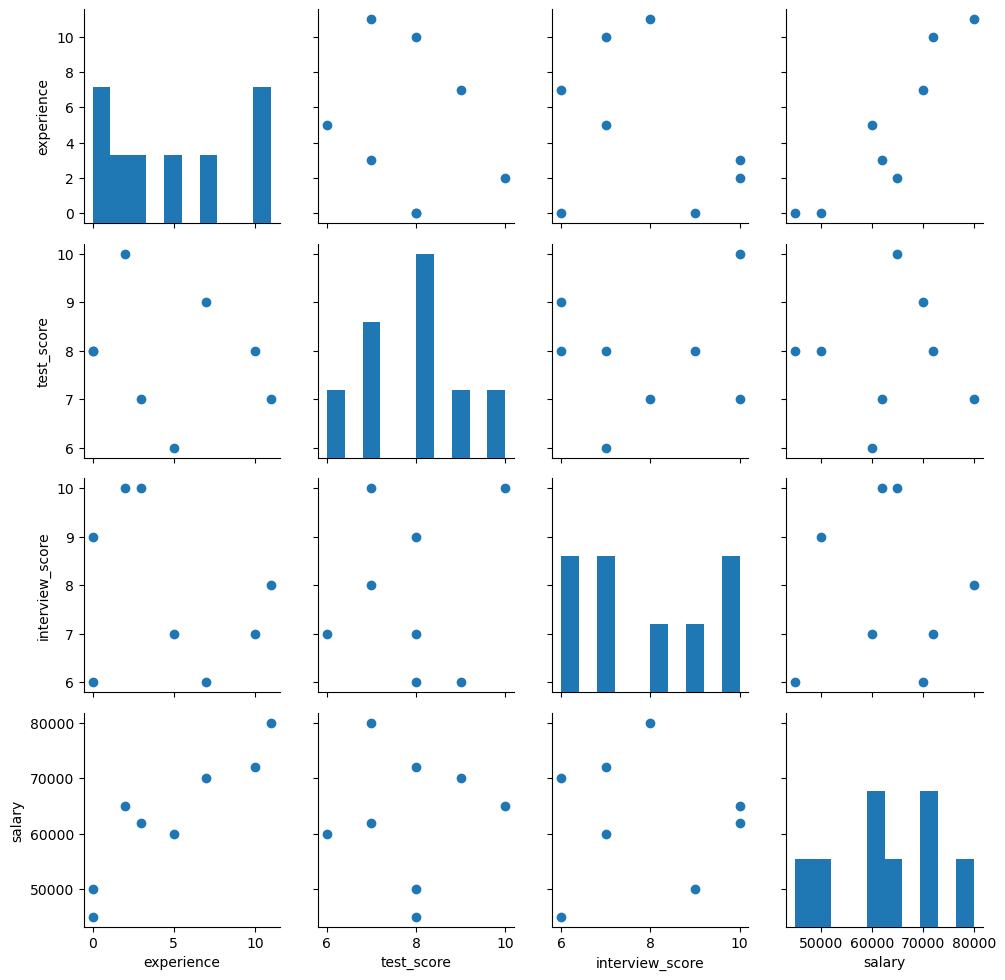

In [27]:
# Pairwise analysis of the selected numeric variables
g = sb.PairGrid(data = df1, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 10);
g.map_offdiag(plt.scatter);

In [28]:
model2 = linear_model.LinearRegression()

In [29]:
model2.fit(df1[['experience', 'test_score', 'interview_score']], df1['salary'])

LinearRegression()

In [30]:
coef = model2.coef_
coef

array([2812.95487627, 1845.70596798, 2205.24017467])

In [31]:
inter = model2.intercept_
inter

17737.26346433768

In [32]:
model2.predict([[12, 8, 4]])

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75079.33042213])

In [33]:
# predictions to make
query = np.array([[2, 9, 6], [12, 10, 10]])

In [34]:
model2.predict(query)

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671, 92002.18340611])